In [35]:
#Import package and Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [37]:
data.shape

(6704, 6)

In [38]:
#rename column
data.columns = ['Age','Gender', 'Degree', 'Job_Title', 'Experience_Years','Salary']

In [39]:
data.tail()

,Age,Gender,Degree,Job_Title,Experience_Years,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [40]:
data.dtypes

Age                 float64
Gender               object
Degree               object
Job_Title            object
Experience_Years    float64
Salary              float64
dtype: object

In [41]:
print(data['Degree'].value_counts())

Degree
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64


In [42]:
# Normalize Degree values
def normalize_degree(degree):
    if pd.isnull(degree):
        return np.nan
    degree = degree.strip().lower()
    if 'master' in degree:
        return "Master"
    elif 'bachelor' in degree:
        return "Bachelor"
    elif 'phd' in degree or 'doctor' in degree:
        return 'PhD'
    else:
        return degree.title()  # Keep others like 'High School' or 'Diploma' as-is

# Apply transformation
data['Degree'] = data['Degree'].apply(normalize_degree)

# Verify result
print(data['Degree'].value_counts())

Degree
Bachelor       3023
Master         1861
PhD            1369
High School     448
Name: count, dtype: int64


In [43]:
data[data.duplicated()]

,Age,Gender,Degree,Job_Title,Experience_Years,Salary
195,28.0,Male,Bachelor,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor,Junior Business Development Associate,2.0,40000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor,Financial Manager,4.0,55000.0
6702,46.0,Male,Master,Marketing Manager,14.0,140000.0


In [44]:
data[data.duplicated()].shape

(4913, 6)

In [45]:
data= data.drop_duplicates(keep='first')

In [46]:
data[data.duplicated()].shape

(0, 6)

In [47]:
data.shape

(1791, 6)

In [48]:
data.isnull().sum()

Age                 1
Gender              1
Degree              2
Job_Title           1
Experience_Years    2
Salary              4
dtype: int64

In [49]:
data.dropna(how ='any', inplace=True)

In [50]:
data.isnull().sum()

Age                 0
Gender              0
Degree              0
Job_Title           0
Experience_Years    0
Salary              0
dtype: int64

In [51]:
print(data.Gender.value_counts())

Gender
Male      966
Female    813
Other       7
Name: count, dtype: int64


In [52]:
# Drop rows where Gender is 'Other'
data = data[data['Gender'] != 'Other']

In [53]:
print(data.Gender.value_counts())

Gender
Male      966
Female    813
Name: count, dtype: int64


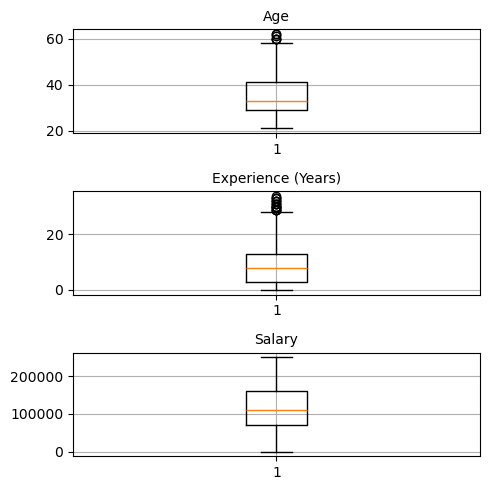

In [54]:
import matplotlib.pyplot as plt

# Smaller figure with tighter layout
plt.figure(figsize=(5,5))  

# Boxplot 1: Age
plt.subplot(3, 1, 1)
plt.boxplot(data['Age'])
plt.title("Age", fontsize=10)
plt.grid(True)

# Boxplot 2: Experience_Years
plt.subplot(3, 1, 2)
plt.boxplot(data['Experience_Years'])
plt.title("Experience (Years)", fontsize=10)
plt.grid(True)

# Boxplot 3: Salary
plt.subplot(3, 1, 3)
plt.boxplot(data['Salary'])
plt.title("Salary", fontsize=10)
plt.grid(True)

# Show compact layout
plt.tight_layout()
plt.show()


In [55]:
print(data['Age'].value_counts())

Age
29.0    106
27.0    104
28.0    104
33.0    104
31.0    100
30.0     92
26.0     90
36.0     81
32.0     78
35.0     66
34.0     65
42.0     56
43.0     54
25.0     51
45.0     50
38.0     49
41.0     47
24.0     47
44.0     45
37.0     45
39.0     41
46.0     39
23.0     34
50.0     33
40.0     30
48.0     29
47.0     26
49.0     25
54.0     19
52.0     17
51.0     14
22.0      7
57.0      6
55.0      6
53.0      4
56.0      4
58.0      4
60.0      3
62.0      2
61.0      1
21.0      1
Name: count, dtype: int64


In [56]:
data = data[(data['Age'] >= 22) & (data['Age'] <= 52)]

In [57]:
print(data['Experience_Years'].value_counts())

Experience_Years
2.0     149
3.0     142
1.0     126
4.0     123
6.0     105
5.0     104
8.0     104
7.0      91
9.0      85
12.0     80
11.0     72
10.0     66
13.0     62
14.0     61
16.0     57
15.0     47
19.0     42
18.0     38
20.0     29
21.0     27
22.0     23
0.0      19
23.0     17
17.0     16
1.5      11
25.0     10
24.0      9
26.0      5
28.0      3
27.0      3
29.0      2
0.5       1
Name: count, dtype: int64


In [58]:
data = data[data['Experience_Years'] <= 25]

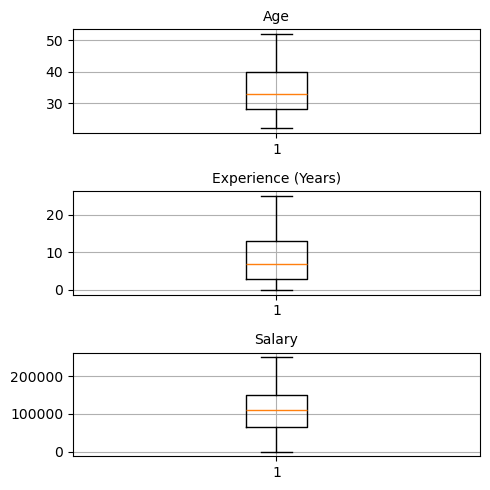

In [59]:
import matplotlib.pyplot as plt

# Smaller figure with tighter layout
plt.figure(figsize=(5,5)) 

# Boxplot 1: Age
plt.subplot(3, 1, 1)
plt.boxplot(data['Age'])
plt.title("Age", fontsize=10)
plt.grid(True)

# Boxplot 2: Experience_Years
plt.subplot(3, 1, 2)
plt.boxplot(data['Experience_Years'])
plt.title("Experience (Years)", fontsize=10)
plt.grid(True)

# Boxplot 3: Salary
plt.subplot(3, 1, 3)
plt.boxplot(data['Salary'])
plt.title("Salary", fontsize=10)
plt.grid(True)

# Show compact layout
plt.tight_layout()
plt.show()

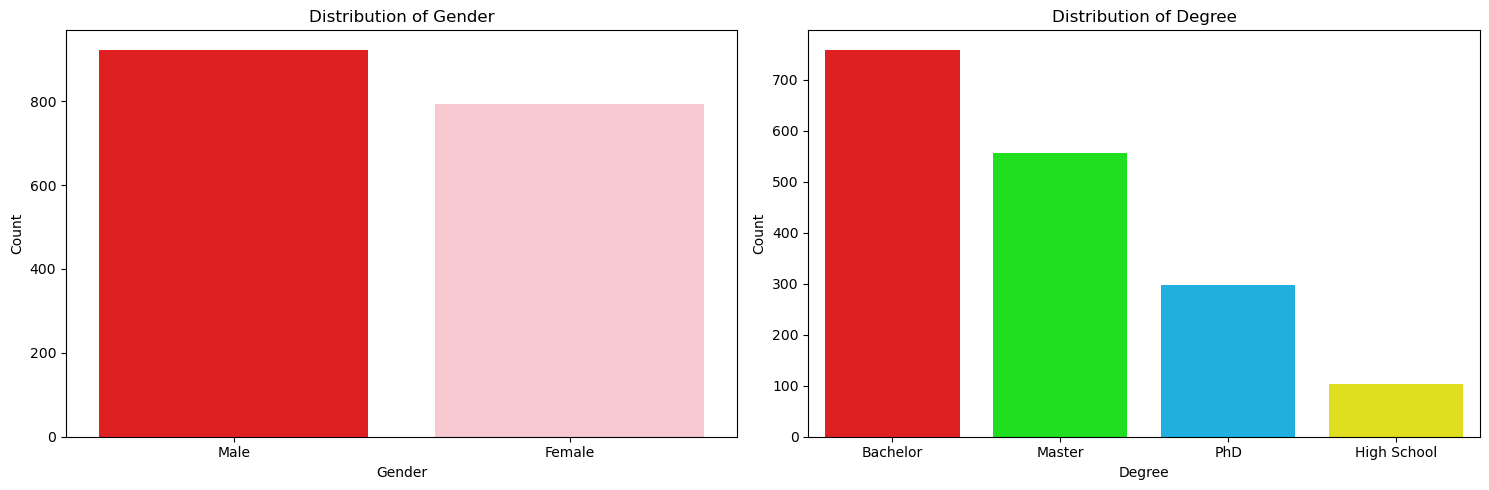

In [95]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the count of data points for each gender category in the first subplot
sns.countplot(x='Gender', data=data, ax=ax[0], hue='Gender', palette={'Male': 'red', 'Female': 'pink'}, legend=False)

# Plot the count of data points for each education level category in the second subplot
sns.countplot(x='Degree', data=data, ax=ax[1], hue='Degree', palette=['red', 'lime', 'deepskyblue', 'yellow'], legend=False)

# Add labels and titles for the subplots
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Degree')

# Show the plots
plt.tight_layout()
plt.show()

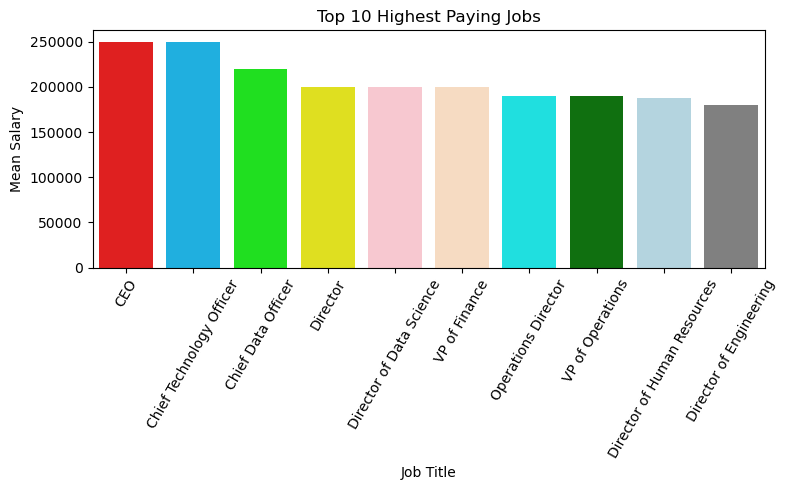

In [86]:
# Get the top 10 job titles with the highest mean salary
top_10_highest_paying_jobs = data.groupby('Job_Title')['Salary'].mean().nlargest(10)

# Create a single bar plot for the top 10 highest paying job titles and their mean salaries
plt.figure(figsize=(8,5))
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values, hue=top_10_highest_paying_jobs.index, palette=['red', 'deepskyblue', 'lime', 'yellow', 'pink', 'peachpuff', 'cyan', 'green', 'lightblue', 'gray'], legend=False)

# Customize the plot
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()

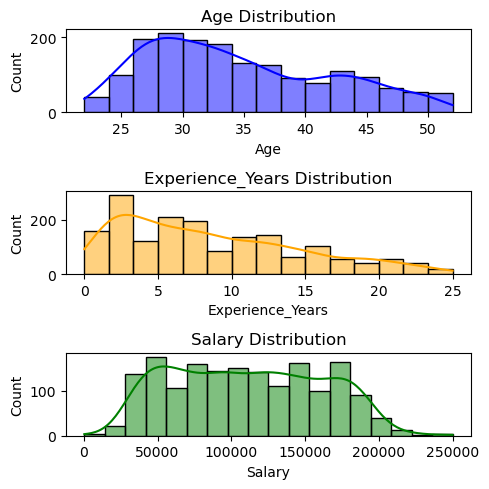

In [98]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(5,5))

# Create a histogram of Age in the first subplot
sns.histplot(data['Age'], ax=ax[0], color='blue', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Experience_Years in the second subplot
sns.histplot(data['Experience_Years'], ax=ax[1], color='orange', kde=True)
ax[1].set_title('Experience_Years Distribution')
ax[1].set_xlabel('Experience_Years')

# Create a histogram of Salary in the third subplot
sns.histplot(data['Salary'], ax=ax[2], color='green', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()

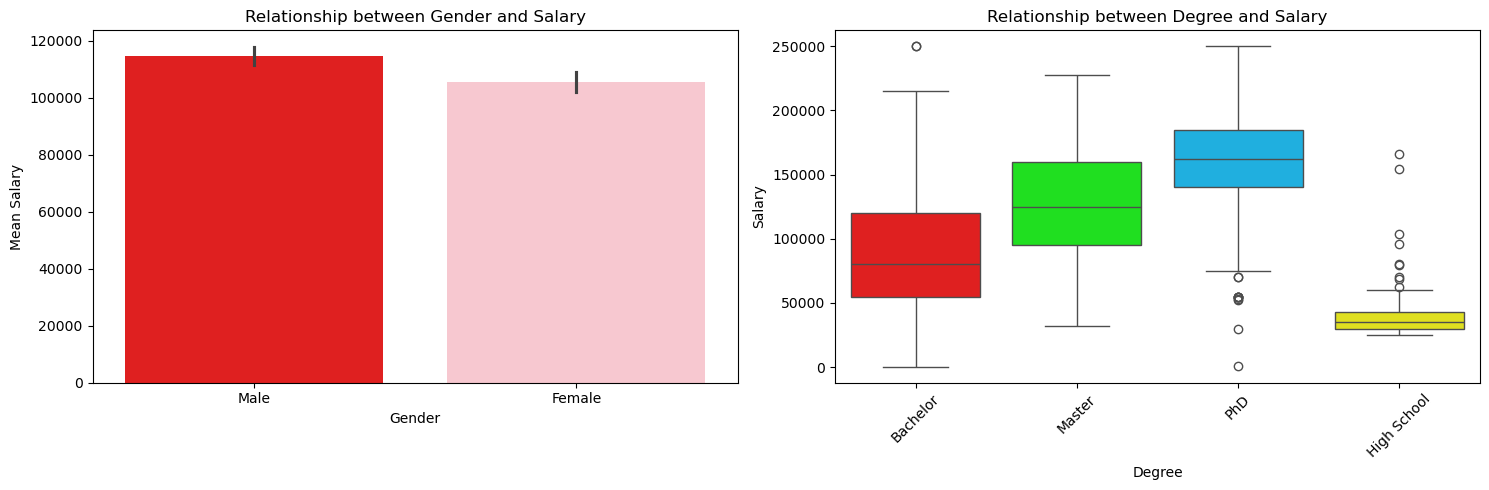

In [96]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a bar plot for the relationship between Gender and Salary in the first subplot
sns.barplot(x='Gender', y='Salary', data=data, ax=ax[0], hue='Gender', palette={'Male': 'red', 'Female': 'pink'}, legend=False)
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')

# Create a box plot for the relationship between Degree and Salary in the second subplot
sns.boxplot(x='Degree', y='Salary', data=data, ax=ax[1], hue='Degree', palette=['red', 'lime', 'deepskyblue', 'yellow'], legend=False)
ax[1].set(title='Relationship between Degree and Salary', xlabel='Degree', ylabel='Salary')

# Rotate x-axis labels in the second subplot for better readability
ax[1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

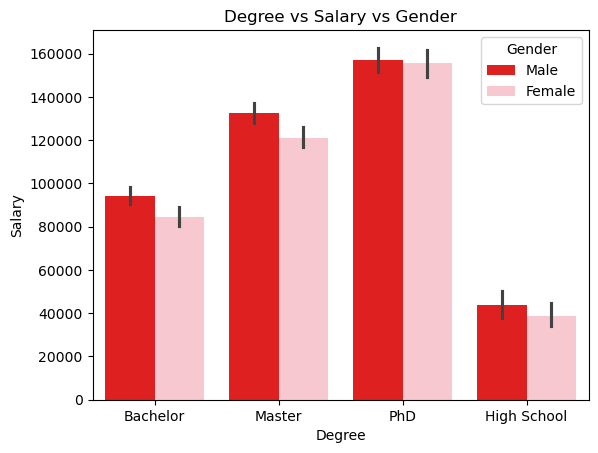

In [99]:
sns.barplot(x='Degree', y='Salary', data=data, hue='Gender', palette={'Male': 'red', 'Female': 'pink'}).set(title='Degree vs Salary vs Gender')
plt.show()

In [103]:
print(data['Salary'].value_counts())

Salary
120000.0    76
40000.0     59
140000.0    56
55000.0     55
170000.0    54
            ..
131960.0     1
184006.0     1
52612.0      1
72649.0      1
215000.0     1
Name: count, Length: 397, dtype: int64


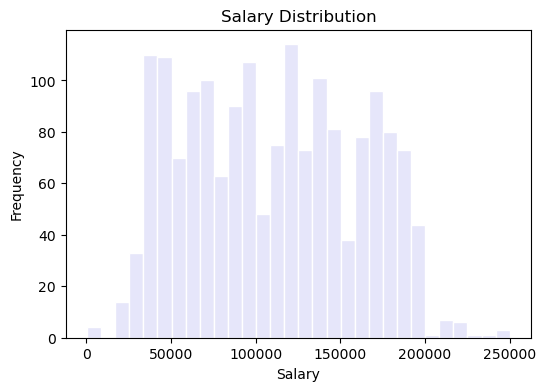

In [109]:
plt.figure(figsize=(6, 4))
plt.hist(data['Salary'], bins=30, color='Lavender', edgecolor='white')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

In [115]:
job_freq = data['Job_Title'].value_counts().to_dict()
data['Job_Title_Encode'] = data['Job_Title'].map(job_freq)
data['Job_Title'] = data['Job_Title'].fillna('Unknown').astype(str)

In [118]:
data['Gender_Encode'] = data['Gender'].map({'Male': 1, 'Female': 0})
degree_map = {"Bachelor": 1, "Master": 2, "PhD": 3, "High School": 4}
data['Degree_Encode'] = data['Degree'].map(degree_map)
X = data[['Age', 'Experience_Years', 'Gender_Encode', 'Degree_Encode', 'Job_Title_Encode']]
y = data['Salary']

In [119]:
data.head()

,Age,Gender,Degree,Job_Title,Experience_Years,Salary,Job_Title_Encode,Gender_Encode,Degree_Encode
0,32.0,Male,Bachelor,Software Engineer,5.0,90000.0,78,1,1
1,28.0,Female,Master,Data Analyst,3.0,65000.0,51,0,2
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,2,1,3
3,36.0,Female,Bachelor,Sales Associate,7.0,60000.0,17,0,1
4,52.0,Male,Master,Director,20.0,200000.0,1,1,2


<Axes: >

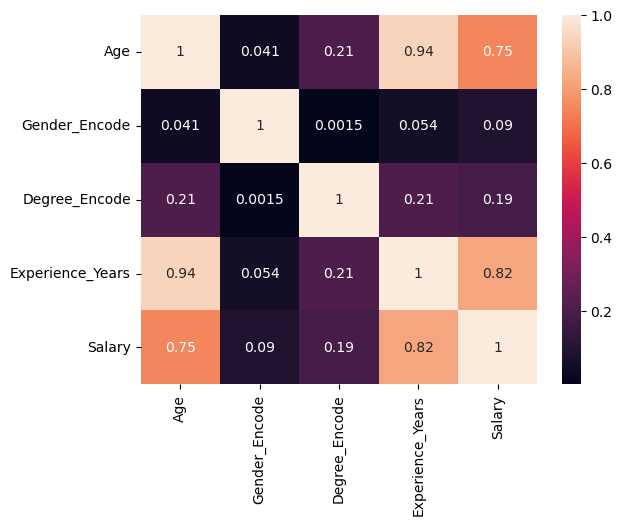

In [124]:
corr=data[['Age','Gender_Encode','Degree_Encode', 'Experience_Years', 'Salary']].corr()
corr
sns.heatmap(corr, annot = True)

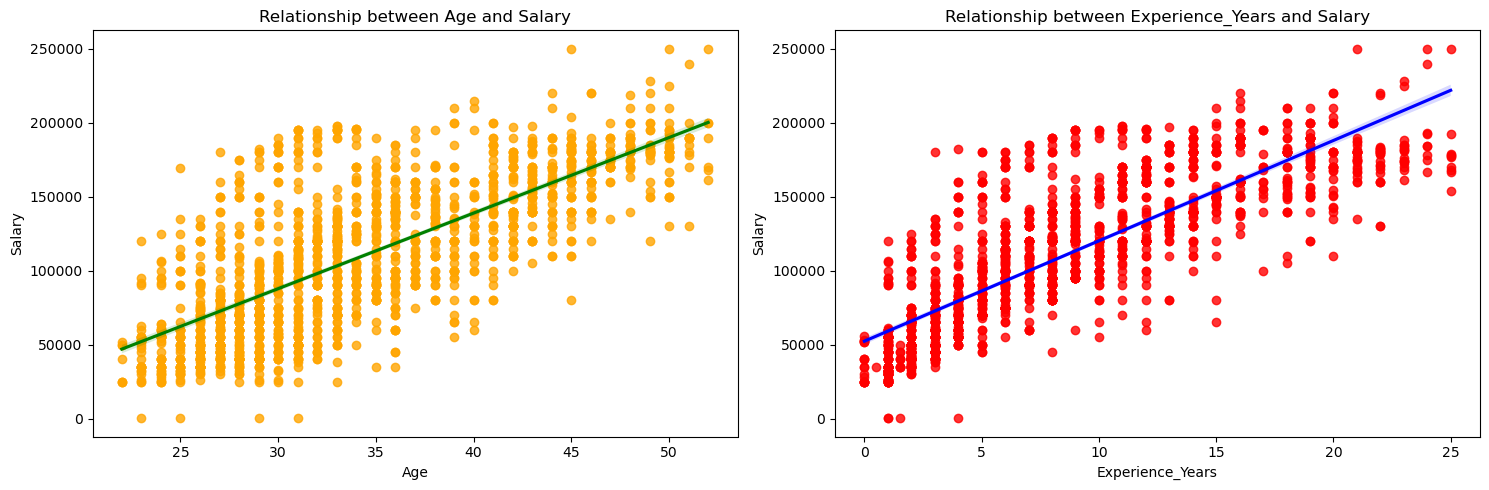

In [125]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Scatter plot for relationship between Age and Salary
sns.regplot(x='Age', y='Salary', data=data, scatter_kws={'color': 'orange'}, line_kws={'color': 'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Salary')

# Scatter plot for relationship between Experience_Years and Salary
sns.regplot(x='Experience_Years', y='Salary', data=data, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience_Years and Salary')

plt.tight_layout()
plt.show()

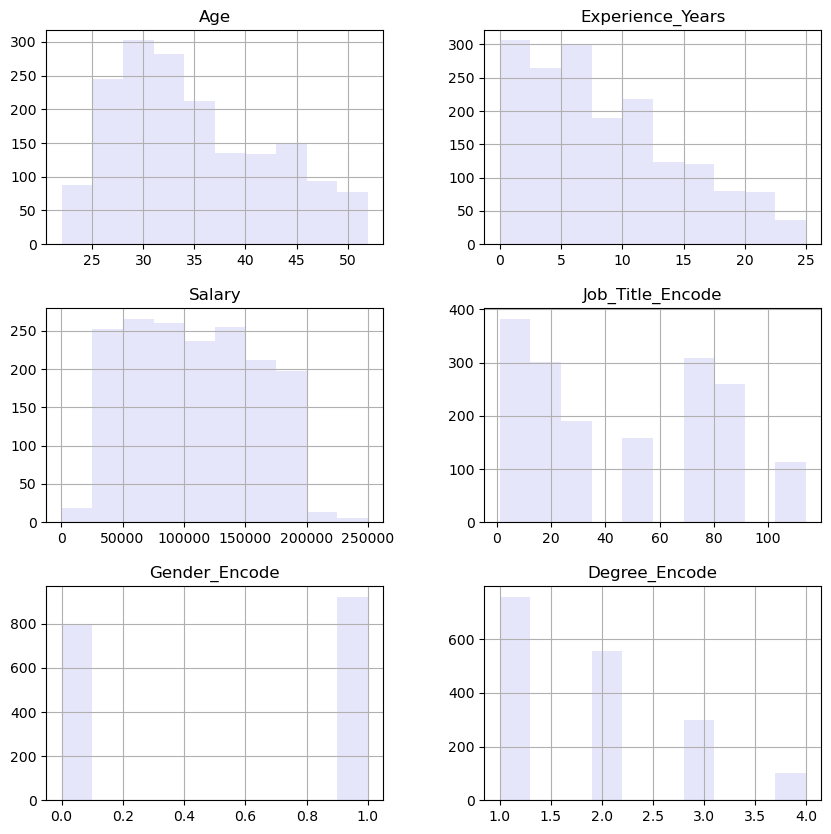

In [131]:
hist_plot = data.hist(figsize = (10,10), color ='Lavender')

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

In [135]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, max_depth=15, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [136]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=250, learning_rate=0.08, max_depth=7, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [137]:
from sklearn.ensemble import VotingRegressor
voter = VotingRegressor([('rf', rf), ('gb', gb)])
voter.fit(X_train, y_train)
y_pred_vote = voter.predict(X_test)

In [138]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [139]:
def evaluate_model(y_true, y_pred, name):
    print(f"\n{name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred, squared=False):.2f}")

In [140]:
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
evaluate_model(y_test, y_pred_vote, "Voting Regressor")


Random Forest
R² Score: 0.8919
MAE: 11302.09
RMSE: 16637.78

Gradient Boosting
R² Score: 0.8766
MAE: 11659.22
RMSE: 17771.30

Voting Regressor
R² Score: 0.8904
MAE: 11157.59
RMSE: 16755.32


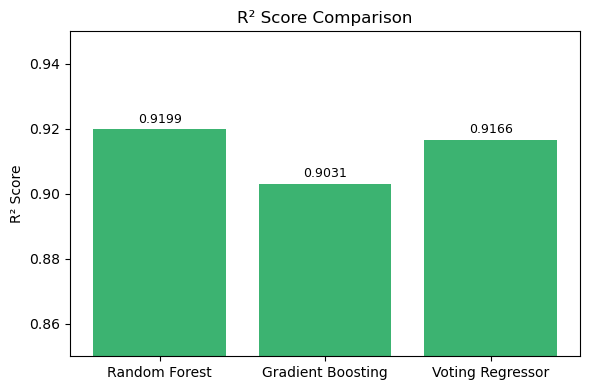

In [143]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Gradient Boosting', 'Voting Regressor']
r2_scores = [0.9199, 0.9031, 0.9166]

plt.figure(figsize=(6, 4))
bars = plt.bar(models, r2_scores, color='mediumseagreen')
plt.ylim(0.85, 0.95)  # Adjusted to zoom in on R² range
plt.title('R² Score Comparison')
plt.ylabel('R² Score')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.002, f'{yval:.4f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [144]:
# Global list to collect model evaluation results
model_names = []
r2_scores = []

def evaluate_model(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    
    # Print scores
    print(f"\n{name}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    
    # Store for dynamic plotting
    model_names.append(name)
    r2_scores.append(r2)


In [145]:
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
evaluate_model(y_test, y_pred_vote, "Voting Regressor")


Random Forest
R² Score: 0.8919
MAE: 11302.09
RMSE: 16637.78

Gradient Boosting
R² Score: 0.8766
MAE: 11659.22
RMSE: 17771.30

Voting Regressor
R² Score: 0.8904
MAE: 11157.59
RMSE: 16755.32


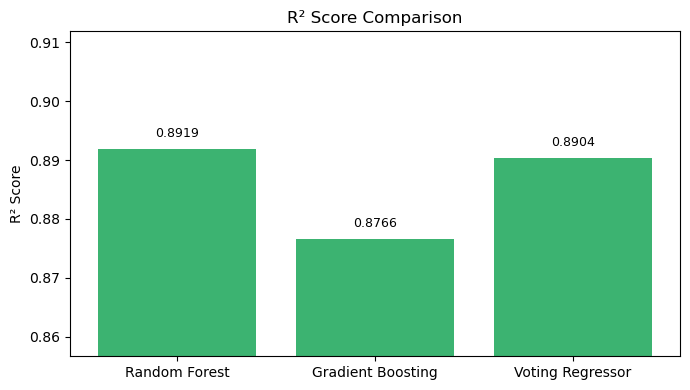

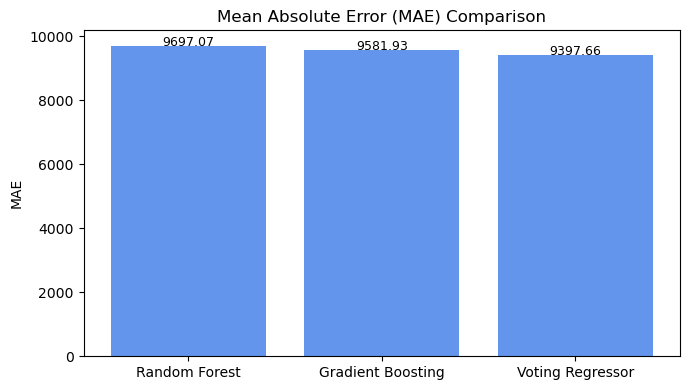

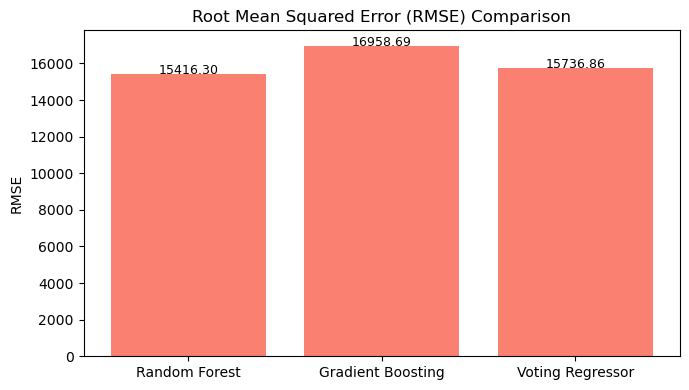

In [160]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
bars = plt.bar(model_names, r2_scores, color='mediumseagreen')
plt.ylim(min(r2_scores) - 0.02, max(r2_scores) + 0.02)
plt.title('R² Score Comparison')
plt.ylabel('R² Score')

# Add score labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.002, f'{yval:.4f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()
plt.figure(figsize=(7,4))
bars = plt.bar(model_names, mae_scores, color='cornflowerblue')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()
plt.figure(figsize=(7, 4))
bars = plt.bar(model_names, rmse_scores, color='salmon')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


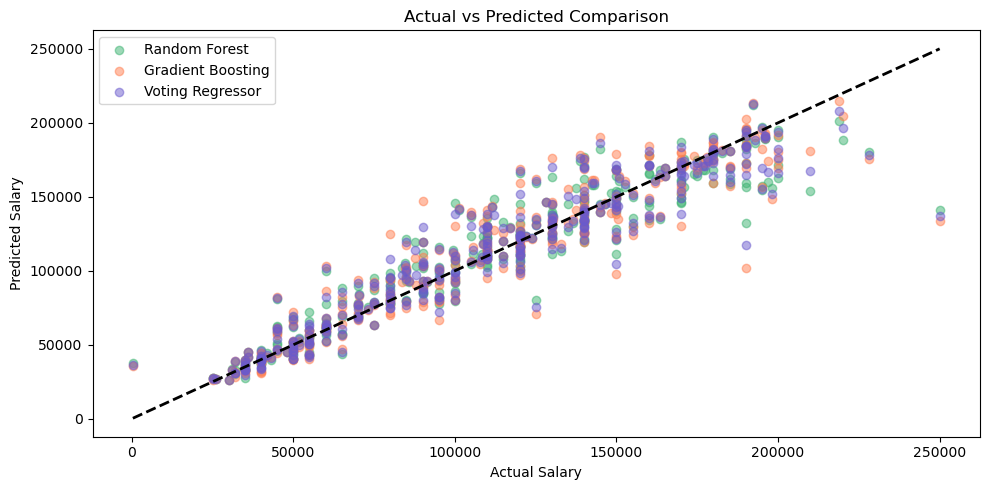

In [161]:
plt.figure(figsize=(10, 5))

# Random Forest
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='mediumseagreen')

# Gradient Boosting
plt.scatter(y_test, y_pred_gb, alpha=0.5, label='Gradient Boosting', color='coral')

# Voting Regressor
plt.scatter(y_test, y_pred_vote, alpha=0.5, label='Voting Regressor', color='slateblue')

# Reference Line (Perfect prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Comparison")
plt.legend()
plt.tight_layout()
plt.show() 

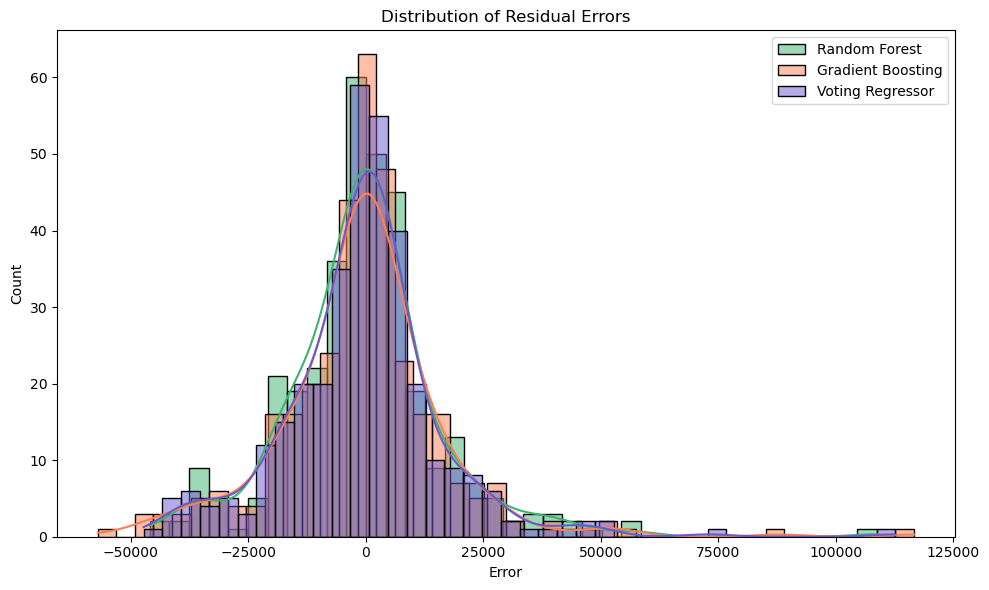

In [162]:
residual_rf = y_test - y_pred_rf
residual_gb = y_test - y_pred_gb
residual_vote = y_test - y_pred_vote

plt.figure(figsize=(10, 6))
sns.histplot(residual_rf, kde=True, label="Random Forest", color="mediumseagreen")
sns.histplot(residual_gb, kde=True, label="Gradient Boosting", color="coral")
sns.histplot(residual_vote, kde=True, label="Voting Regressor", color="slateblue")
plt.title("Distribution of Residual Errors")
plt.xlabel("Error")
plt.legend()
plt.tight_layout()
plt.show()

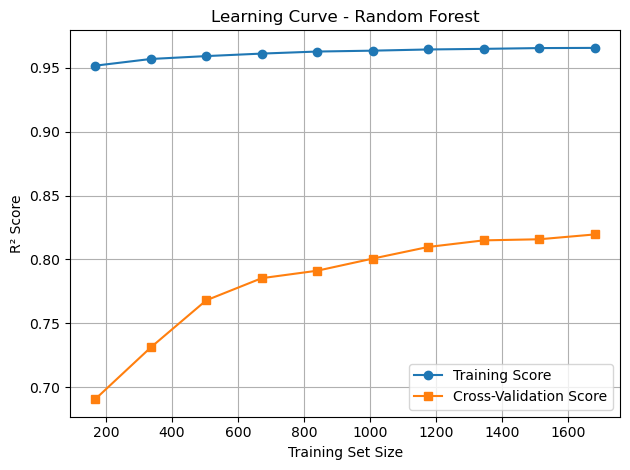

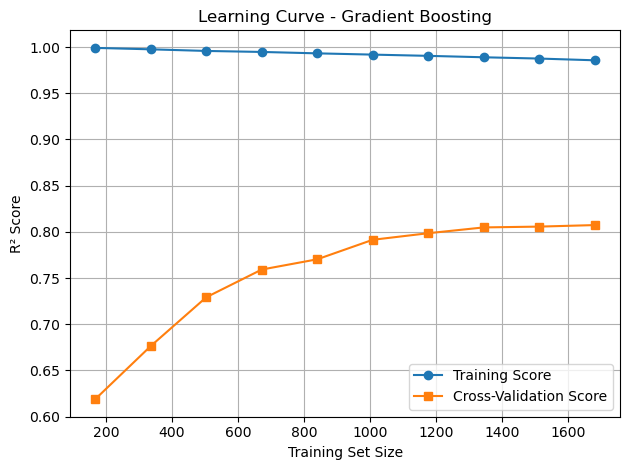

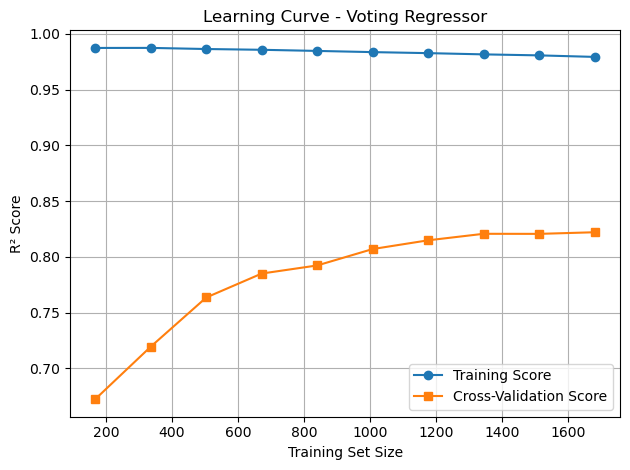

In [166]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, cv=50, scoring="r2"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
    plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", marker='s')
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotting learning curves for each model
plot_learning_curve(rf, "Learning Curve - Random Forest", X, y)
plot_learning_curve(gb, "Learning Curve - Gradient Boosting", X, y)
plot_learning_curve(voter, "Learning Curve - Voting Regressor", X, y)


In [169]:
import joblib
joblib.dump(voter, "best_salary_model.pkl")
print("\n Saved Voting Regressor as 'best_salary_model.pkl'")


 Saved Voting Regressor as 'best_salary_model.pkl'
